## Imports

In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [460]:
#Importação do DataSet
data = pd.read_csv(r'D:\Trabalho C3 - Análise de dados\Base de dados\train.csv')

# 1 - Análise exploratória dos dados


# Análise das variáveis e validação de quantidade de valores nulos/faltantes.

In [461]:
#Informações gerais das variáveis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [462]:
#Remoção campo ID pois não será necessário para as análises
data = data.drop('Id', axis=1)

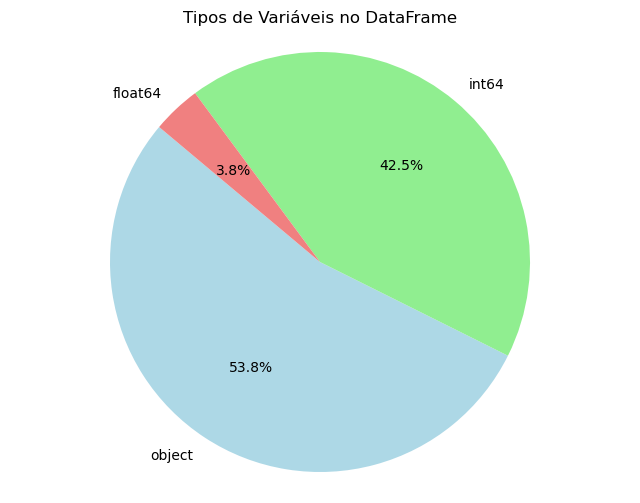

In [463]:
#Porcentagem dos tipos de variáveis

# Contar quantas colunas são de cada tipo
types_count = data.dtypes.value_counts()

# Preparar dados para o gráfico de pizza
labels = types_count.index
sizes = types_count.values

# Configurar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Tipos de Variáveis no DataFrame')
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo

plt.show()

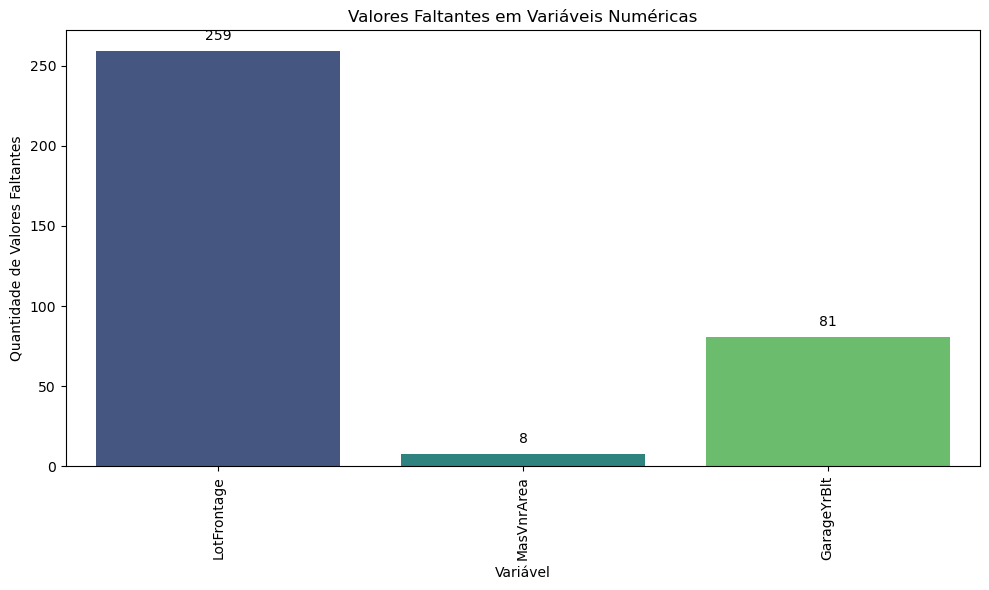

In [464]:
# Quantidade nulas presentes nas variáveis numéricas

# Selecionar apenas as colunas numéricas
numeric_cols = data.select_dtypes(include='number').columns

# Calcular a quantidade de valores faltantes em cada coluna numérica
missing_values = data[numeric_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Quantidade de Valores Faltantes')
plt.title('Valores Faltantes em Variáveis Numéricas')

# Adicionar rótulos com os valores exatos acima de cada barra
for i, value in enumerate(missing_values.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Melhora a disposição dos elementos no gráfico
plt.show()

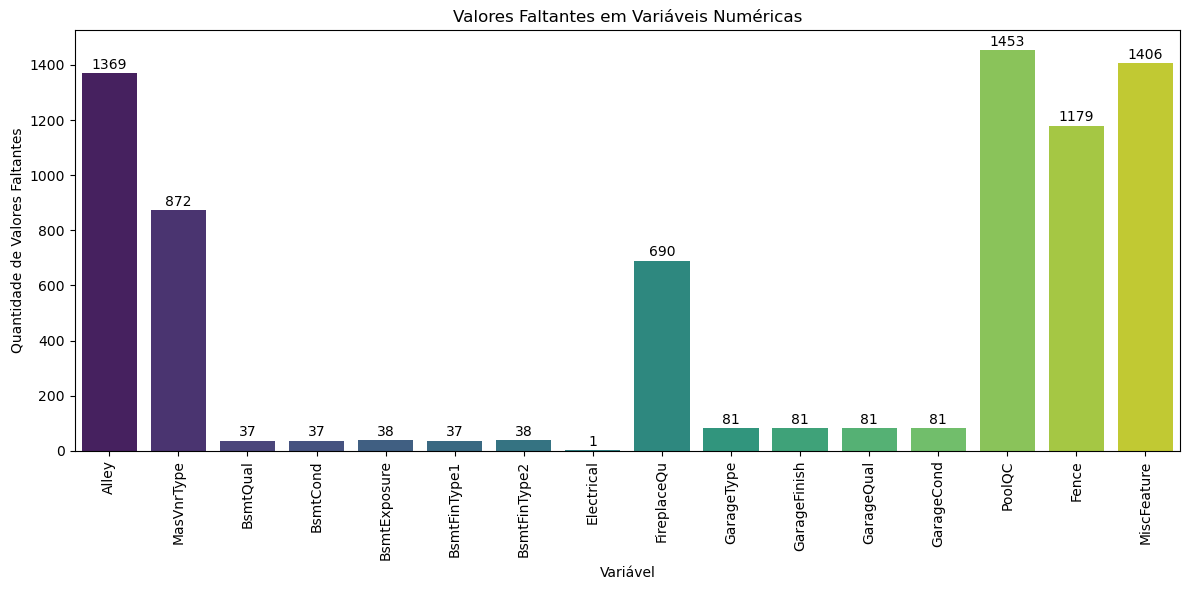

In [465]:
# Quantidade nulas presentes nas variáveis não numéricas

# Selecionar apenas as colunas numéricas
numeric_cols = data.select_dtypes(include='object').columns

# Calcular a quantidade de valores faltantes em cada coluna numérica
missing_values = data[numeric_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Quantidade de Valores Faltantes')
plt.title('Valores Faltantes em Variáveis Numéricas')

# Adicionar rótulos com os valores exatos acima de cada barra
for i, value in enumerate(missing_values.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Melhora a disposição dos elementos no gráfico
plt.show()

In [466]:
#Descrição de algumas métricas dos dados
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Correlação das variáveis com o preço do imóvel

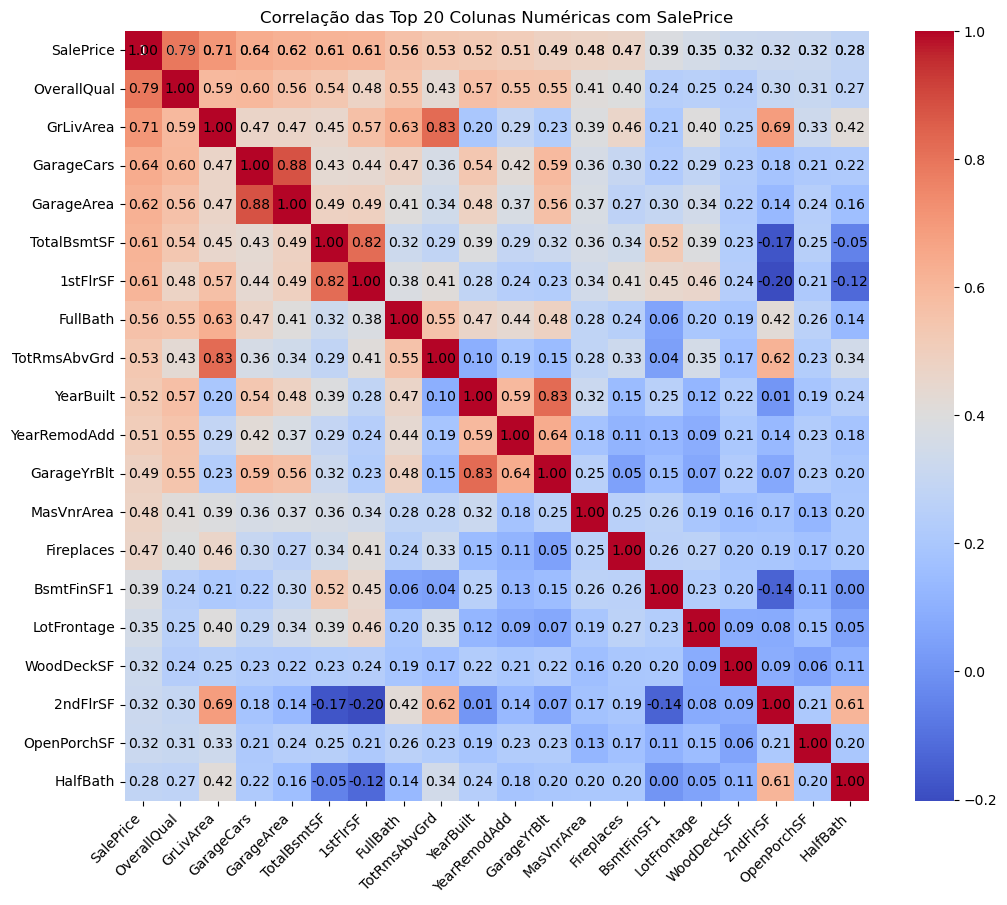

In [467]:
#Levantamento de indices de correlação, visando entender quais são os fatores que mais e menos influenciam no valor do imóvel

# Selecionar as colunas numéricas
numeric_columns = data.select_dtypes(include='number')

# Calcular a matriz de correlação
corr_matrix_numeric = numeric_columns.corr()

# Selecionar as 20 maiores correlações com a coluna "SalePrice"
top_corr_numeric = corr_matrix_numeric['SalePrice'].sort_values(ascending=False).head(20)

# Filtrar a matriz de correlação com as colunas selecionadas
corr_matrix_top_numeric = numeric_columns[top_corr_numeric.index].corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))

# Criar o mapa de calor
heatmap = sns.heatmap(corr_matrix_top_numeric, annot=True, cmap='coolwarm')

# Adicionar os valores das células no mapa de calor
for i in range(len(corr_matrix_top_numeric)):
    for j in range(len(corr_matrix_top_numeric.columns)):
        text = '{:.2f}'.format(corr_matrix_top_numeric.iloc[i, j])
        heatmap.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

# Adicionar os nomes das colunas nos eixos x e y
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Configurar o título do gráfico
plt.title('Correlação das Top 20 Colunas Numéricas com SalePrice')

# Exibir o gráfico
plt.show()


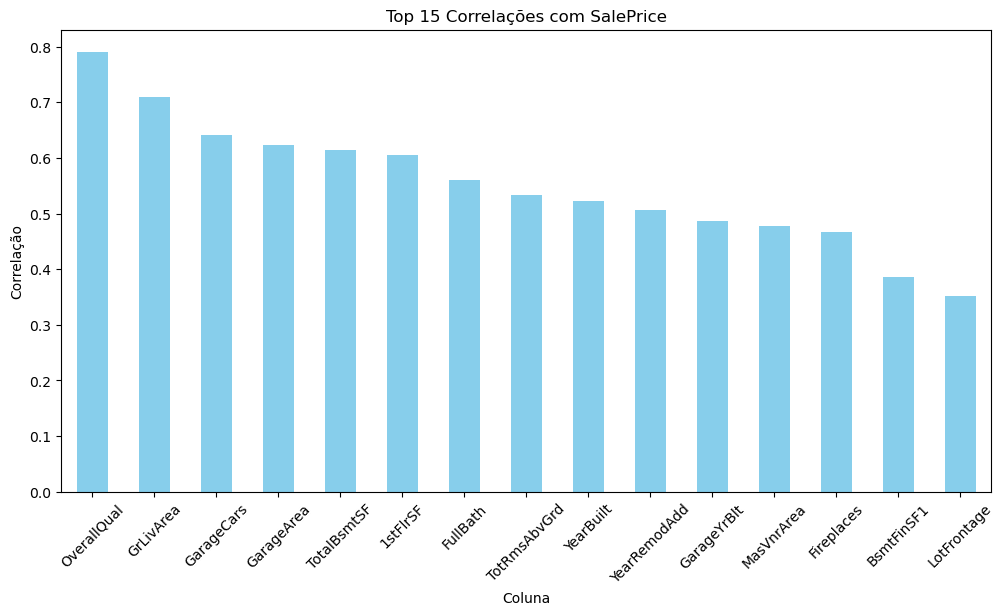

In [468]:
# Selecionar as 15 variáveis com maior correlação com 'SalePrice'
top_corr = corr_matrix_numeric['SalePrice'].nlargest(16)[1:]

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
top_corr.plot(kind='bar', color='skyblue')
plt.title('Top 15 Correlações com SalePrice')
plt.xlabel('Coluna')
plt.ylabel('Correlação')
plt.xticks(rotation=45)
plt.show()


Através dessa análise conseguimos fazer um levantamento de quais são os fatores com maior e menor relacionamento com o preço do imóvel.

## Verificando Outliers e Assimetrias
Essa análise é feita visando remover valores fora da curva, que podem acabar influenciando a análise.

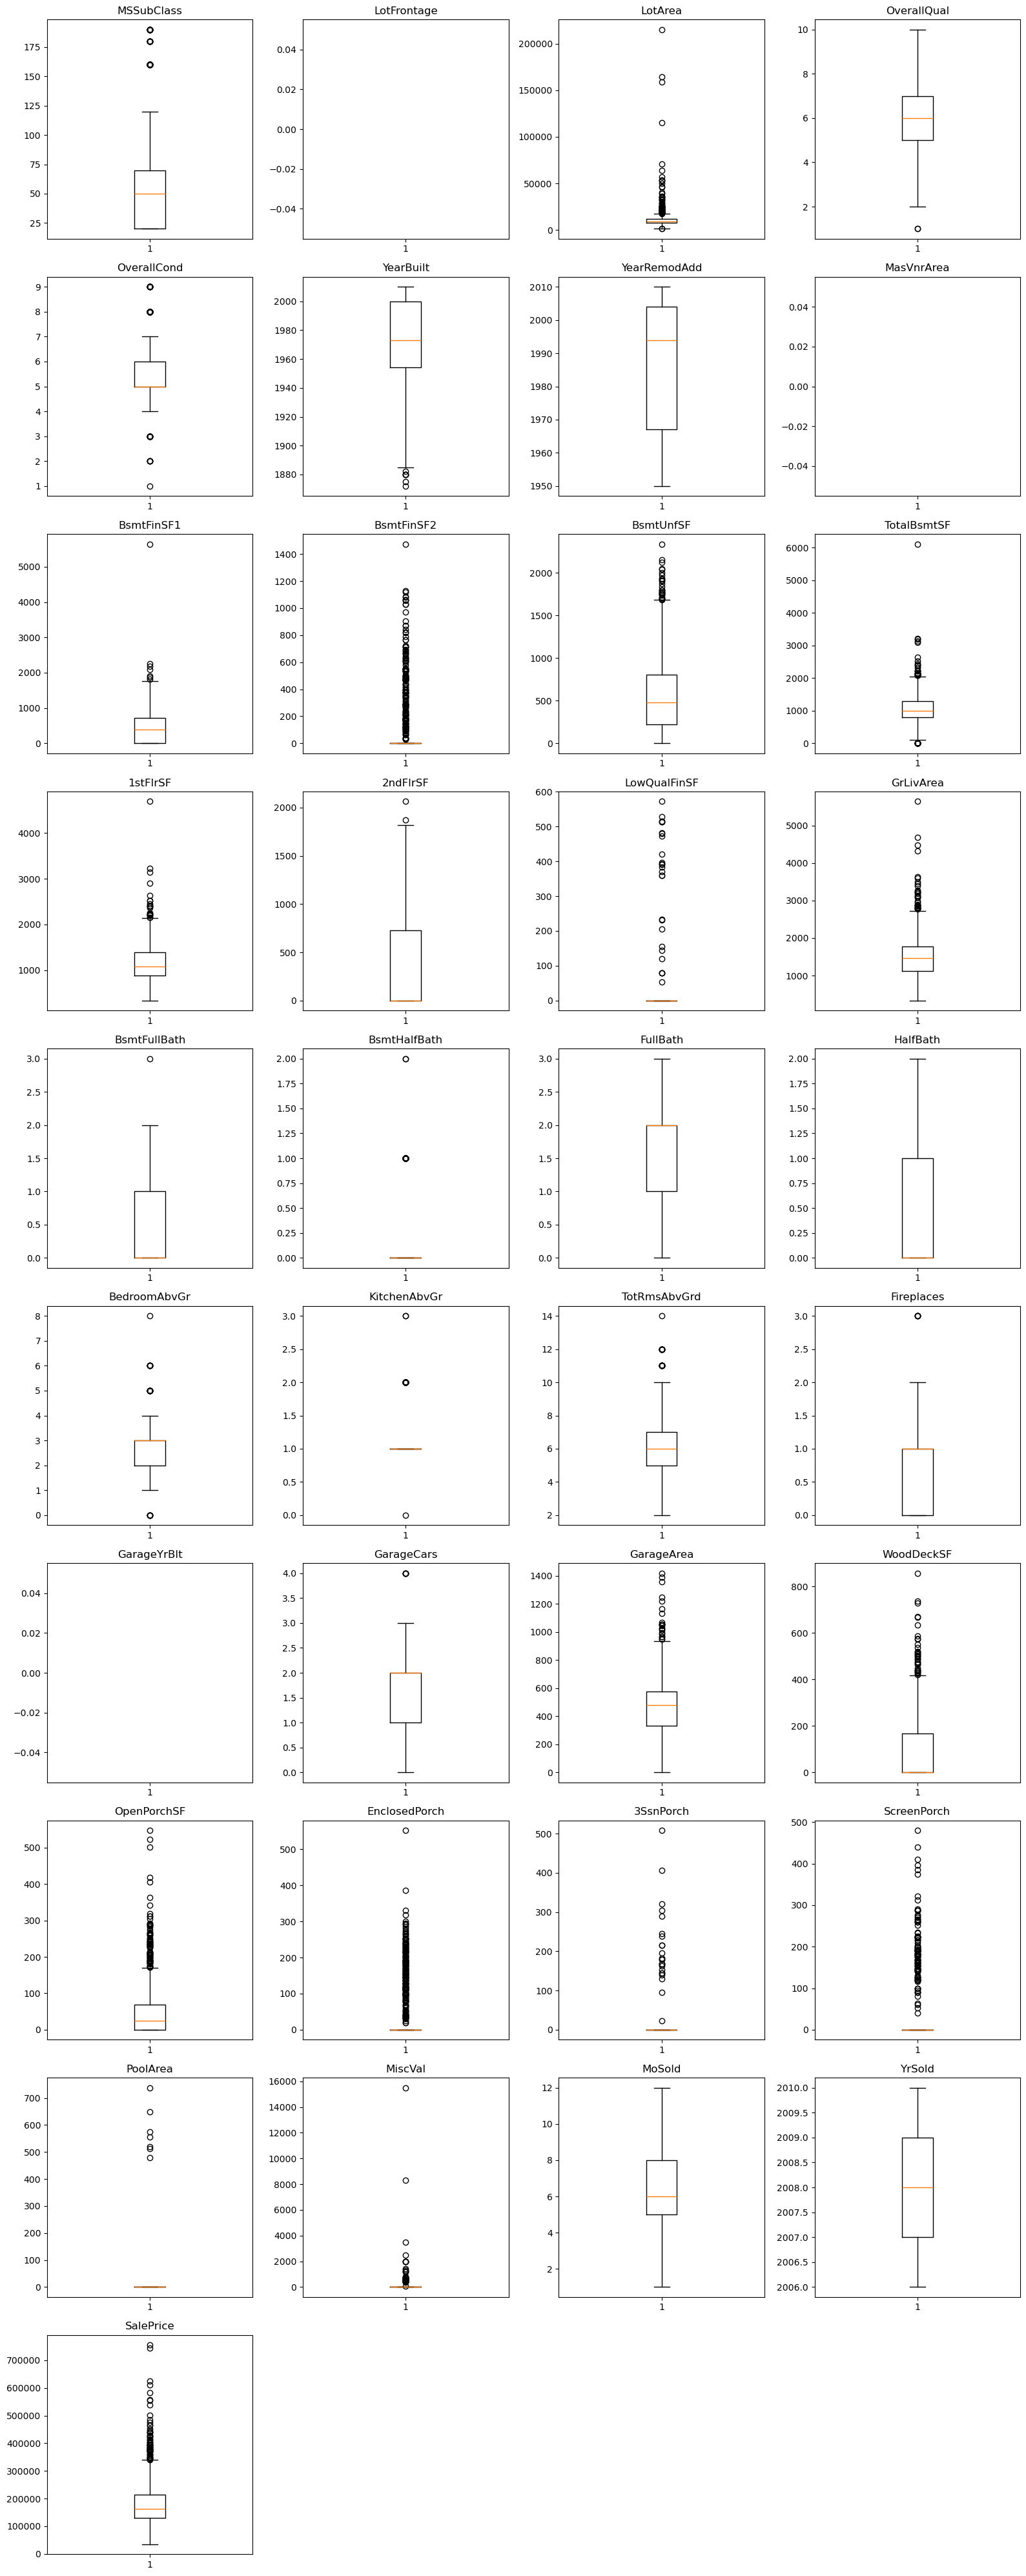

In [469]:
import matplotlib.pyplot as plt
import numpy as np

# Selecionar apenas as colunas numéricas para análise
colunas_numericas = data.select_dtypes(include='number').columns

# Calcular as dimensões da matriz de subplots
num_cols = len(colunas_numericas)
num_rows = (num_cols - 1) // 4 + 1

# Criar a matriz de subplots
fig, axs = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))

# Gerar os gráficos boxplot para cada coluna numérica
for i, coluna in enumerate(colunas_numericas):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    ax.boxplot(data[coluna])
    ax.set_title(coluna)

# Remover os subplots vazios
for i in range(num_rows * 4 - num_cols):
    fig.delaxes(axs.flatten()[num_cols + i])

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


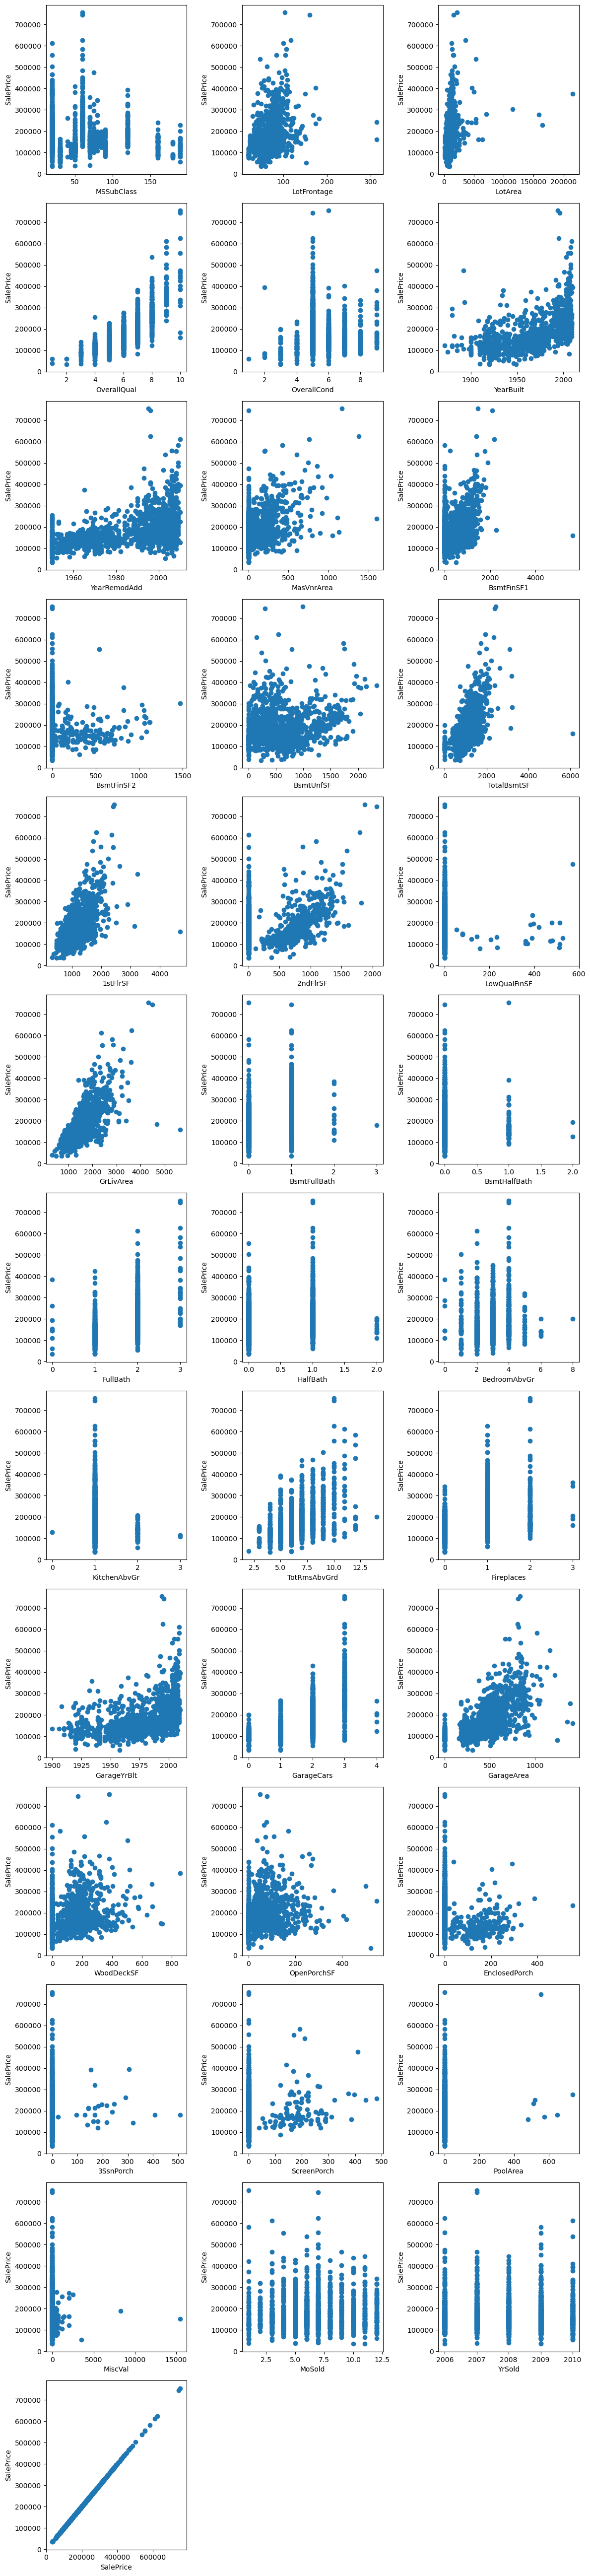

In [470]:
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas para análise
colunas_numericas = data.select_dtypes(include='number').columns

# Calcular as dimensões da matriz de subplots
num_cols = len(colunas_numericas)
num_rows = (num_cols - 1) // 3 + 1

# Criar a matriz de subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))

# Gerar os gráficos de dispersão para cada coluna numérica em relação à coluna 'SalePrice'
for i, coluna in enumerate(colunas_numericas):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.scatter(data[coluna], data['SalePrice'])
    ax.set_xlabel(coluna)
    ax.set_ylabel('SalePrice')

# Remover os subplots vazios
for i in range(num_rows * 3 - num_cols):
    fig.delaxes(axs.flatten()[num_cols + i])

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


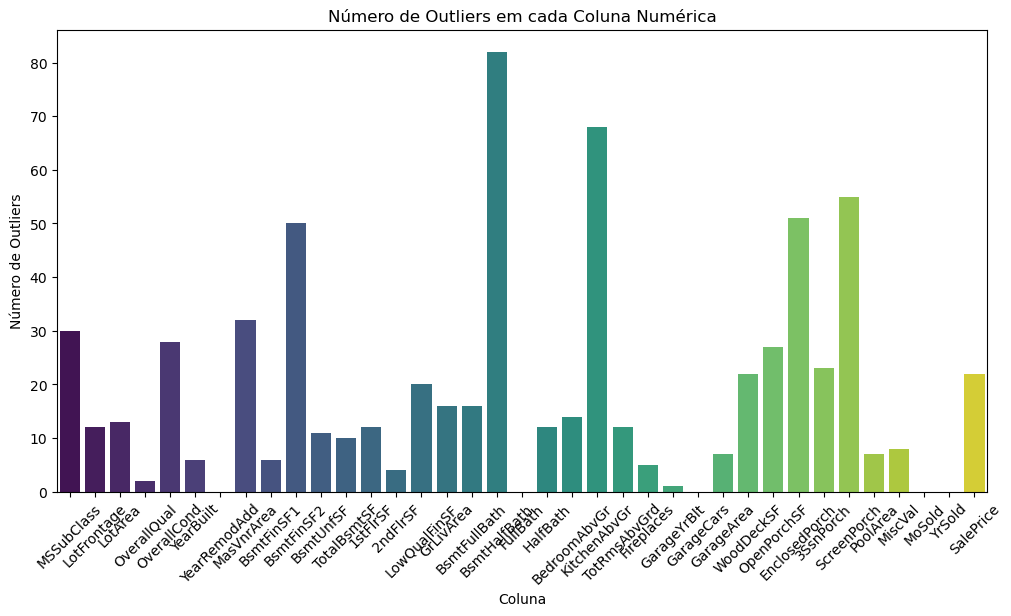

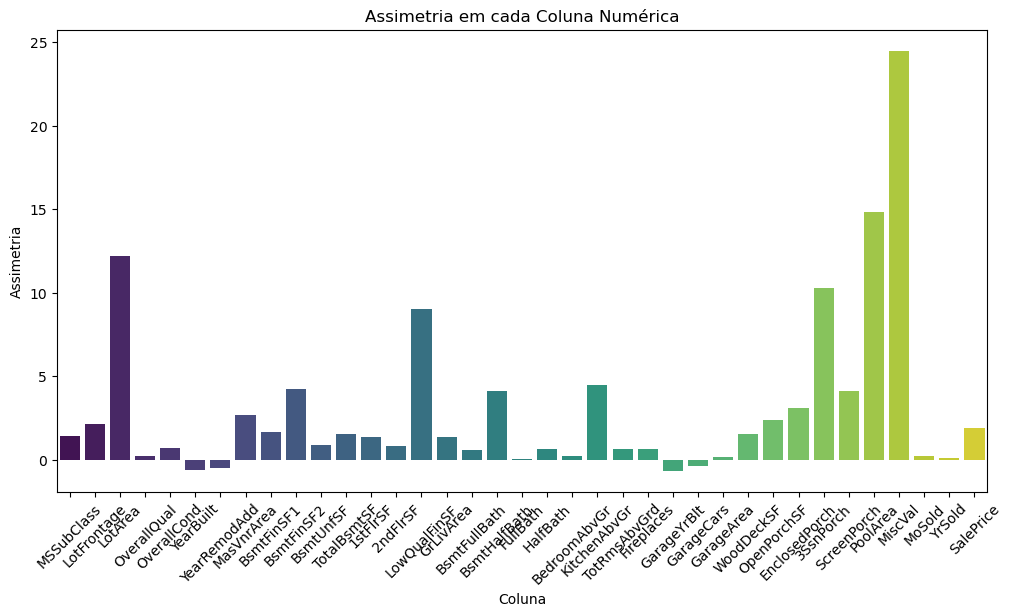

In [471]:
#Gráfico para indicar número de outliers
#Gráfico para indicar número de assimetria

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular o número de outliers em cada coluna
num_outliers = [len(data[(data[coluna] < data[coluna].mean() - 3 * data[coluna].std()) | (data[coluna] > data[coluna].mean() + 3 * data[coluna].std())]) for coluna in colunas_numericas]

# Criar um gráfico de barras para os outliers
plt.figure(figsize=(12, 6))
sns.barplot(x=colunas_numericas, y=num_outliers, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Coluna')
plt.ylabel('Número de Outliers')
plt.title('Número de Outliers em cada Coluna Numérica')
plt.show()

# Criar um gráfico de barras para a assimetria
assimetria = [data[coluna].skew() for coluna in colunas_numericas]

plt.figure(figsize=(12, 6))
sns.barplot(x=colunas_numericas, y=assimetria, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Coluna')
plt.ylabel('Assimetria')
plt.title('Assimetria em cada Coluna Numérica')
plt.show()


In [472]:
# Selecionar apenas as colunas numéricas para análise
colunas_numericas = data.select_dtypes(include='number').columns

# Inicializar listas para armazenar as medidas de assimetria e a quantidade de outliers
assimetrias = []
qtd_outliers = []

# Calcular a assimetria e a quantidade de outliers para cada coluna numérica
for coluna in colunas_numericas:
    # Calcular os limites para outliers
    limite_inferior = data[coluna].mean() - 3 * data[coluna].std()
    limite_superior = data[coluna].mean() + 3 * data[coluna].std()
    
    # Contar a quantidade de outliers
    outliers = data[(data[coluna] < limite_inferior) | (data[coluna] > limite_superior)]
    qtd_outliers.append(len(outliers))
    
    # Calcular a assimetria
    assimetria = data[coluna].skew()
    assimetrias.append(abs(assimetria))

# Criar um DataFrame com as medidas de assimetria e quantidade de outliers
df_distorcoes = pd.DataFrame({'Coluna': colunas_numericas, 'Assimetria': assimetrias, 'Qtd_Outliers': qtd_outliers})

# Ordenar o DataFrame pelas colunas com maior probabilidade de distorção
top_10_distorcoes = df_distorcoes.nlargest(10, ['Assimetria', 'Qtd_Outliers']).reset_index(drop=True)

# Adicionar a coluna de posição
top_10_distorcoes['Posição'] = top_10_distorcoes.index + 1

# Reorganizar as colunas para colocar 'Posição' como a primeira coluna
top_10_distorcoes = top_10_distorcoes[['Posição', 'Coluna', 'Assimetria', 'Qtd_Outliers']]

# Exibir as 10 colunas com maior probabilidade de distorção
print("Top 10 colunas com maior probabilidade de distorção:")
print(top_10_distorcoes)


Top 10 colunas com maior probabilidade de distorção:
   Posição         Coluna  Assimetria  Qtd_Outliers
0        1        MiscVal   24.476794             8
1        2       PoolArea   14.828374             7
2        3        LotArea   12.207688            13
3        4      3SsnPorch   10.304342            23
4        5   LowQualFinSF    9.011341            20
5        6   KitchenAbvGr    4.488397            68
6        7     BsmtFinSF2    4.255261            50
7        8    ScreenPorch    4.122214            55
8        9   BsmtHalfBath    4.103403            82
9       10  EnclosedPorch    3.089872            51


# 2 - Feature engineering

# Remoção de valores Outliers

In [473]:
# Calcular estatísticas do SalePrice
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers
data_filtered = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]

# Verificar o número de registros remanescentes
num_records_filtered = data_filtered.shape[0]
num_records_total = data.shape[0]
num_outliers_removed = num_records_total - num_records_filtered

# Imprimir informações
print(f"Número de outliers removidos: {num_outliers_removed}")
print(f"Número de registros remanescentes: {num_records_filtered}")

Número de outliers removidos: 61
Número de registros remanescentes: 1399


# Visualisando distribuição dos dados numéricos

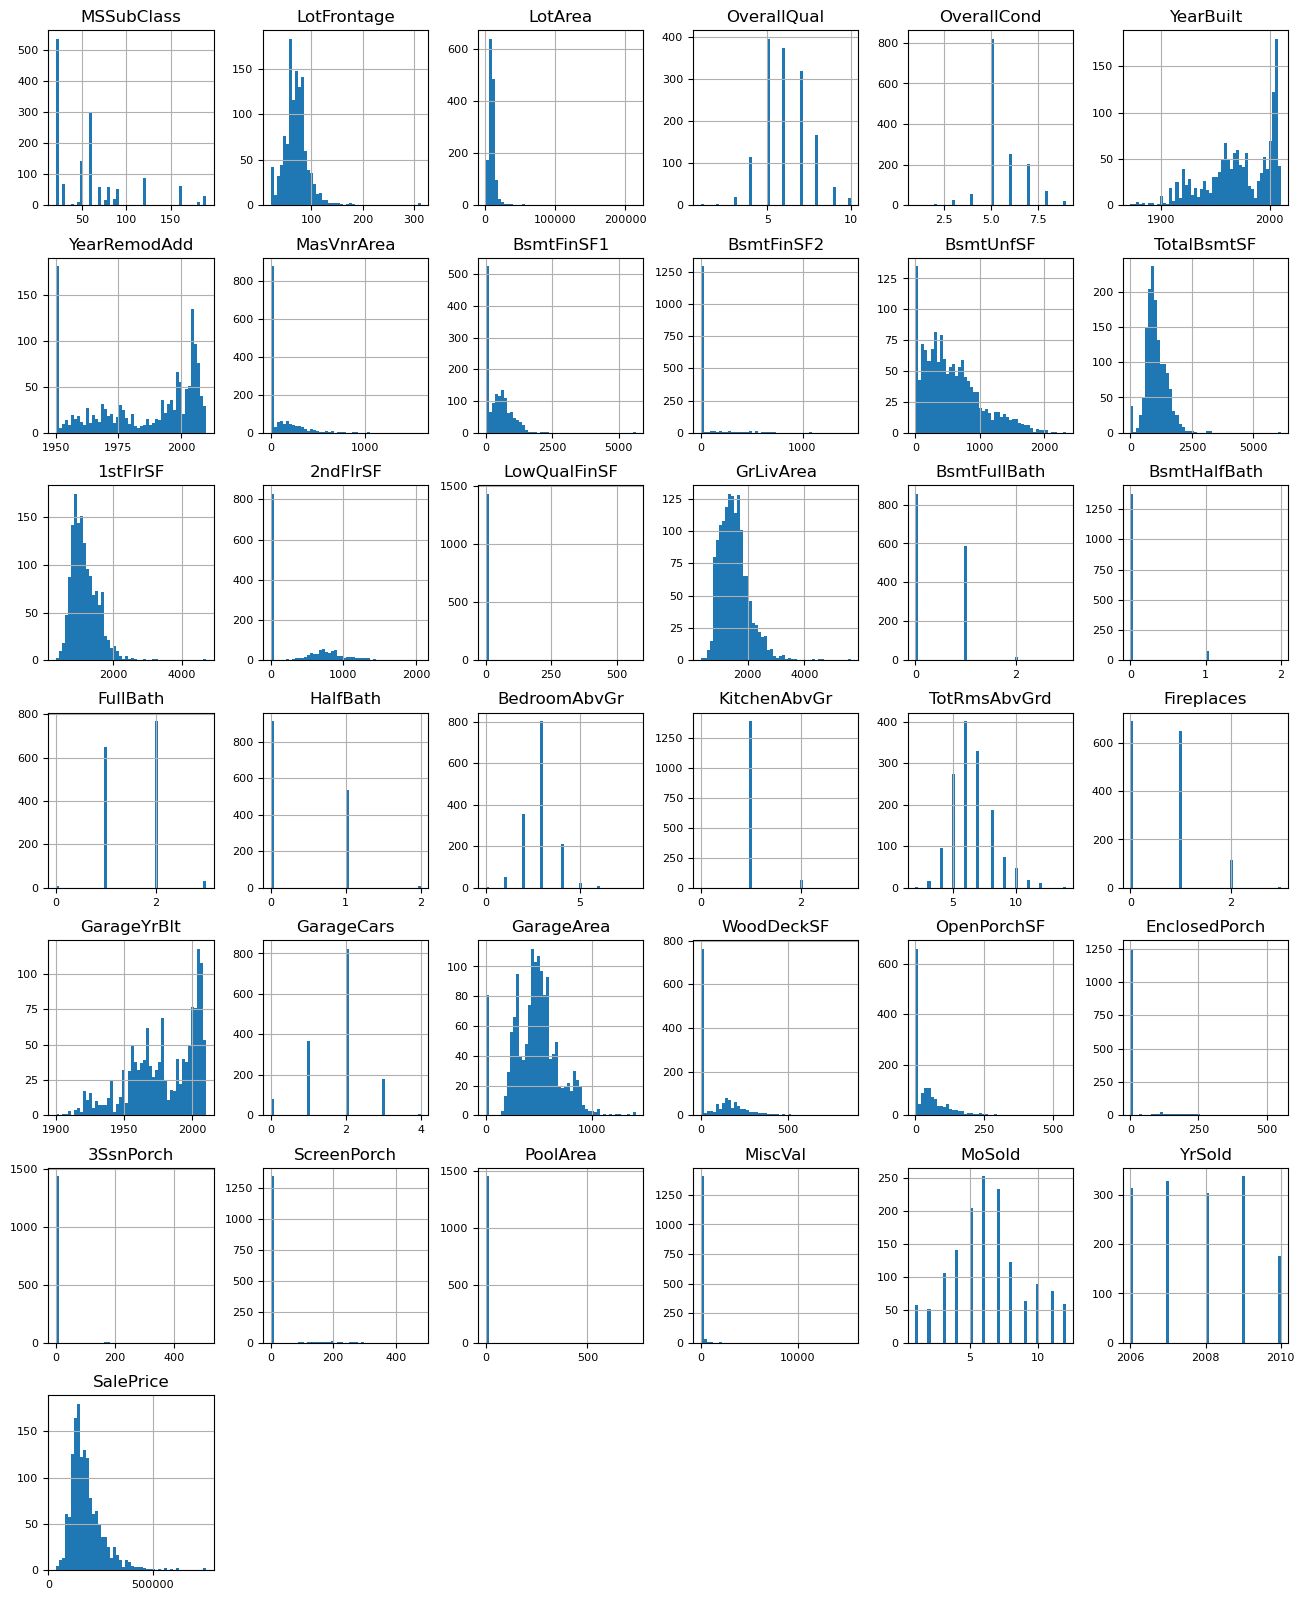

In [474]:
colunas_numericas = data.select_dtypes(include = ['float64', 'int64'])
colunas_numericas.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

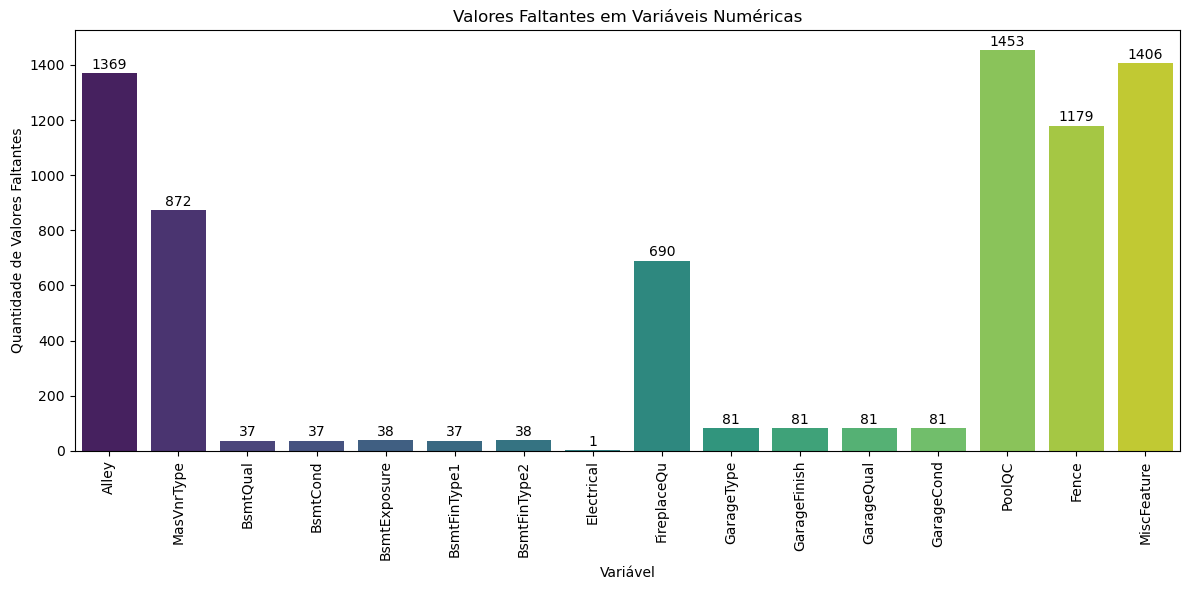

In [475]:
# Quantidade nulas presentes nas variáveis não numéricas

# Selecionar apenas as colunas numéricas
numeric_cols = data.select_dtypes(include='object').columns

# Calcular a quantidade de valores faltantes em cada coluna numérica
missing_values = data[numeric_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Quantidade de Valores Faltantes')
plt.title('Valores Faltantes em Variáveis Numéricas')

# Adicionar rótulos com os valores exatos acima de cada barra
for i, value in enumerate(missing_values.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Melhora a disposição dos elementos no gráfico
plt.show()

Podemos notar que existe algumas colunas com um grande volume de dados faltantes, para tratar esse problema iremos remove-las do nosso dataset.

# Remoção de colunas

In [476]:
# Remoção colunas com maiores dados faltantes
colunas_remover = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'MasVnrType']
data = data.drop(colunas_remover, axis=1)

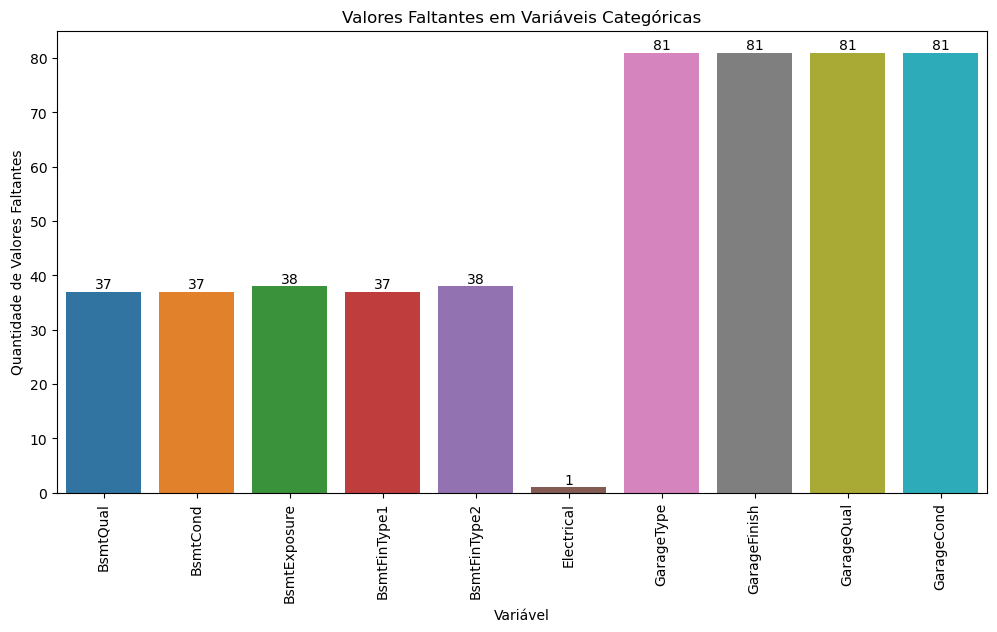

In [477]:
# Selecionar apenas as colunas categóricas (objetos)
object_cols = data.select_dtypes(include='object').columns

# Calcular a quantidade de valores faltantes em cada coluna categórica
missing_values = data[object_cols].isnull().sum()

# Filtrar apenas as colunas com valores faltantes
missing_values = missing_values[missing_values > 0]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Variável')
plt.ylabel('Quantidade de Valores Faltantes')
plt.title('Valores Faltantes em Variáveis Categóricas')

# Adicionar a legenda com os valores exatos
for i, value in enumerate(missing_values.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

Após remover as variáveis númericas com maior quantidade de valores faltantes, o próximo passo é preencher as que sobraram.

# Preenchendo dados

In [478]:
# Preenchendo dados das colunas númericas

# Identificar as colunas inteiras com dados faltantes
colunas_inteiras = data.select_dtypes(include=['int']).columns
colunas_inteiras_faltantes = data[colunas_inteiras].isnull().any()

# Identificar as colunas float com dados faltantes
colunas_float = data.select_dtypes(include=['float']).columns
colunas_float_faltantes = data[colunas_float].isnull().any()

# Preencher colunas inteiras com a média
data[colunas_inteiras] = data[colunas_inteiras].fillna(data[colunas_inteiras].mean())

# Preencher colunas float com a média
data[colunas_float] = data[colunas_float].fillna(data[colunas_float].mean())

In [479]:
# Preenchendo dados das colunas objetos

data['MSZoning'].fillna('RL', inplace=True)
data['Utilities'].fillna('AllPub', inplace=True)
data['BsmtQual'].fillna('TA', inplace=True)
data['BsmtCond'].fillna('No', inplace=True)
data['BsmtExposure'].fillna('GLQ', inplace=True)
data['BsmtFinType1'].fillna('Unf', inplace=True)
data['BsmtFinType2'].fillna('Unf', inplace=True)
data['KitchenQual'].fillna('TA', inplace=True)
data['Functional'].fillna('Min2', inplace=True)
data['GarageType'].fillna('Attchd', inplace=True)
data['GarageFinish'].fillna('Unf', inplace=True)
data['GarageQual'].fillna('TA', inplace=True)
data['GarageCond'].fillna('TA', inplace=True)
data['SaleType'].fillna('WD', inplace=True)
data['Electrical'].fillna('SBrkr', inplace=True)

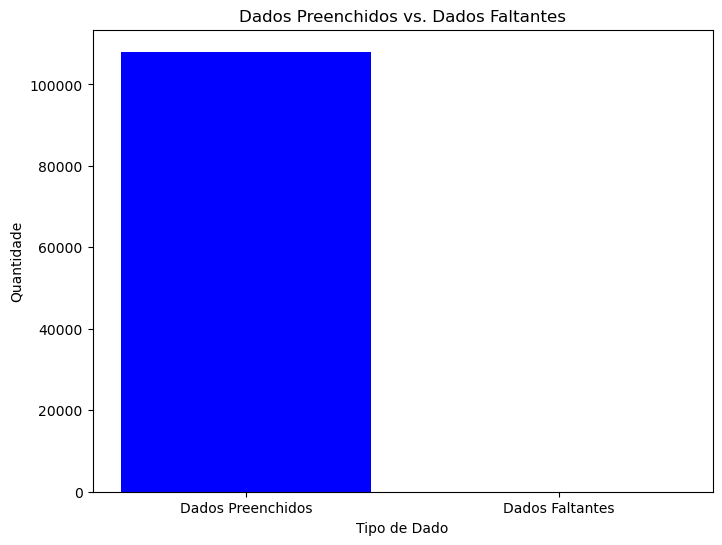

In [480]:
import matplotlib.pyplot as plt

# Calcular a quantidade total de dados
total_data = data.size

# Calcular a quantidade de campos preenchidos
filled_data = data.count().sum()

# Calcular a quantidade de campos vazios
missing_data = total_data - filled_data

# Criar uma lista de rótulos para o gráfico de barras
labels = ['Dados Preenchidos', 'Dados Faltantes']

# Criar uma lista de valores para o gráfico de barras
values = [filled_data, missing_data]

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Tipo de Dado')
plt.ylabel('Quantidade')
plt.title('Dados Preenchidos vs. Dados Faltantes')
plt.show()


Com isso, é possível visualizar que todos os dados faltantes foram preenchidos com a média de suas respectivas variáveis.

# 3 - Aprendizagem supervisionada

In [481]:
# Crie uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Itere sobre as colunas com objetos e aplique o Label Encoder
for col in data.select_dtypes(include='object'):
    data[col] = label_encoder.fit_transform(data[col])

# Verifique as colunas transformadas
print(data.head())

   MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0  

Primeiro iremos preparar algumas colunas com o LabelEnconder, convertendo categorias para indices numéricos.

# Modelo de Regressão Linear

In [482]:
# Separar as características (X) e os preços das casas (y)
X = data.drop(['SalePrice'], axis=1)  # Colunas com as características da casa, exceto o preço
y = data['SalePrice']  # Coluna com os preços das casas

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Random Forest para regressão
modelo = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_pred = modelo.predict(X_test)

# Calcular as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

j_test = y_test
j_pred = y_pred

r2 = r2_score(y_test, y_pred)


# Imprimir as métricas de avaliação
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 17538.843595890412
Root Mean Squared Error (RMSE): 28321.568403898378
R-squared (R2): 0.8954267113039973


Aplicando o regressão linear para analise, conseguimos as seguintes informações:

MAE indica que em média, as previsões estão a cerca de 13800 de distância dos valores reais de venda. *RMS  significa que os erros das previsões têm, em média, cerca de230224 de desvio em relação aos valores reais **** explica que cerca d934% da variabilidade dos preços de venda.



# Classificação

In [483]:
# Ignorar warnings de convergência apenas para esta célula
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    
    # Definir um limite de preço para classificação (exemplo: 200.000)
    limite_preco = 180000
    
    # Criar a variável de saída binária
    y_class = np.where(data['SalePrice'] > limite_preco, 1, 0)
    
    # Dividir os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
    
    # Criar o modelo de classificação (por exemplo, Logistic Regression)
    model = LogisticRegression()
    
    # Treinar o modelo com os dados de treinamento
    model.fit(X_train, y_train)
    
    # Fazer previsões usando o modelo treinado
    y_pred = model.predict(X_test)
    
    # Avaliar o desempenho do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Imprimir as métricas de avaliação
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("---------------")
    
    for idx, pred in enumerate(y_pred):
        if idx >= 10:
            break
        if pred == 1:
            print(f"Casa {idx} foi vendida por um preço alto")
        else:
            print(f"Casa {idx} foi vendida por um preço baixo")

Accuracy: 0.8938356164383562
Precision: 0.9418604651162791
Recall: 0.7570093457943925
---------------
Casa 0 foi vendida por um preço baixo
Casa 1 foi vendida por um preço alto
Casa 2 foi vendida por um preço baixo
Casa 3 foi vendida por um preço baixo
Casa 4 foi vendida por um preço alto
Casa 5 foi vendida por um preço baixo
Casa 6 foi vendida por um preço baixo
Casa 7 foi vendida por um preço baixo
Casa 8 foi vendida por um preço baixo
Casa 9 foi vendida por um preço baixo


A análise foi realizada utilizando um modelo de regressão logística. 


Accuracy (Acurácia): A proporção de previsões corretas em relação ao total de previsões. Neste caso, o modelo acertou aproximadamente 90% das previsões.

Precision (Precisão): A proporção de previsões corretas de casas vendidas por preço alto em relação ao total de previsões de casas classificadas como vendidas por preço alto. Ou seja, entre as casas que o modelo previu como vendidas por preço alto, 94% realmente foram vendidas por esse preço.

Recall (Revocação ou Sensibilidade): A proporção de previsões corretas de casas vendidas por preço alto em relação ao total de casas que realmente foram vendidas por preço alto. Ou seja, o modelo identificou corretamente 76,6% das casas vendidas por preço alto.

# 4 - Aprendizagem não supervisionada

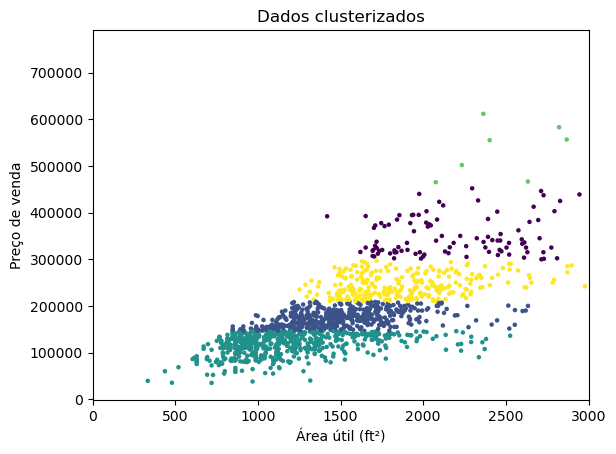

In [484]:
import warnings

# Ignorar warnings de convergência apenas para esta célula
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    df_cleaned_kmeans = data
    
    # Criar o modelo K-means com 5 clusters e definir n_init como 10
    kmeans = KMeans(n_clusters=5, n_init=10)
    
    # Treinar o modelo com os dados
    kmeans.fit(df_cleaned_kmeans)
    
    # Adicionar as previsões do modelo aos dados
    df_cleaned_kmeans['cluster'] = kmeans.predict(df_cleaned_kmeans)
    
    # Plotar os dados com as cores dos clusters
    plt.scatter(df_cleaned_kmeans['GrLivArea'], df_cleaned_kmeans['SalePrice'], c=df_cleaned_kmeans['cluster'], s=5)
    
    plt.xlim(0, 3000)
    plt.xlabel('Área útil (ft²)')
    plt.ylabel('Preço de venda')
    plt.title('Dados clusterizados')
    plt.show()


Cria um agrupamento/cluster conforme a relação do preço de venda com área útil do imóvel.

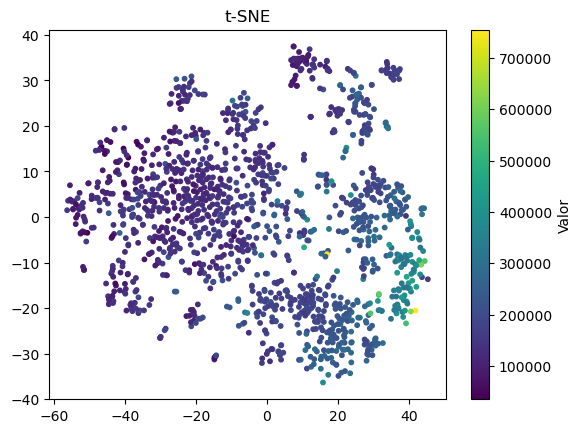

In [485]:
# Carregando o dataset
caracteristicas = data.drop('SalePrice', axis=1)
valores = data['SalePrice']

X, y = caracteristicas, valores
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Definindo o modelo e ajustando-o aos dados
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_norm)

# Plotando os resultados
plt.scatter(X_tsne[:, 0], X_tsne[:, 1] , c=y, s=10)
plt.colorbar(label='Valor')
plt.title('t-SNE')
plt.show()

Esse gráfico ajuda a visualizar a distribuição dos dados das casas de forma simplificada, mostrando padrões e agrupamentos de acordo com suas características e valores de venda.

# 5 - Métricas de avaliação e comparação

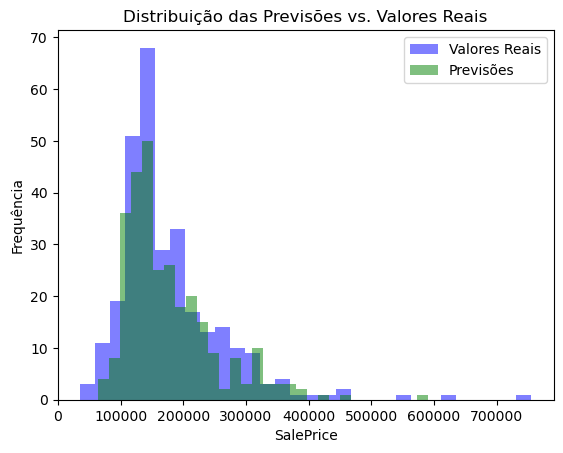

In [486]:
# Plotar o histograma das previsões e valores reais
plt.hist(j_test, bins=30, alpha=0.5, color='blue', label='Valores Reais')
plt.hist(j_pred, bins=30, alpha=0.5, color='green', label='Previsões')
plt.xlabel('SalePrice')
plt.ylabel('Frequência')
plt.title('Distribuição das Previsões vs. Valores Reais')
plt.legend()
plt.show()

Nesse gráfico conseguimos enxergar as similaridades reproduzidas pelo modelo de regressão lineas. 

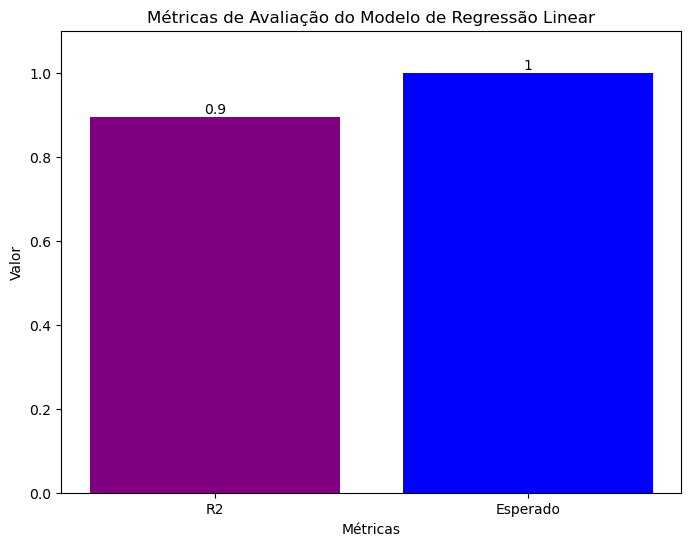

In [487]:
# Métricas de avaliação
metrics = ['R2', 'Esperado']
values = [r2, 1]
colors = ['purple', 'blue']  # Cor da barra para R2 e Esperado

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=colors)

# Adicionar rótulos aos valores das barras
for i, value in enumerate(values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Configurar características do gráfico
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas de Avaliação do Modelo de Regressão Linear')
plt.ylim(0, max(values) * 1.1)

# Exibir o gráfico
plt.show()


R-squared (R2): 0.930896758551294


R-squared (R2): O R² é uma medida da qualidade do ajuste do modelo aos dados. Ele varia de 0 a 1, onde 1 indica um ajuste perfeito. Neste caso, o R² é de aproximadamente 0.93, o que indica que o modelo explica cerca de 93% da variabilidade dos dados, o que é considerado um bom ajuste.

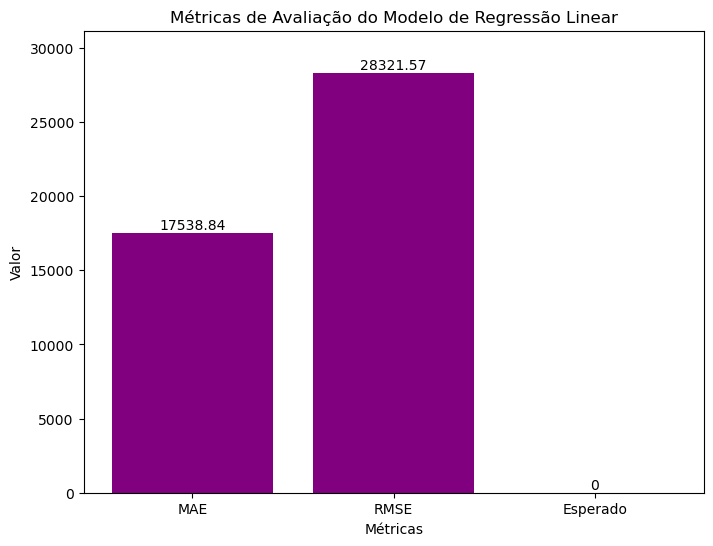

In [488]:
# Métricas de avaliação
metrics = ['MAE', 'RMSE', 'Esperado']
values = [mae, rmse, 0]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
colors = ['purple', 'purple', 'green']  # Cores para MAE, RMSE, Esperado
plt.bar(metrics, values, color=colors)

# Adicionar rótulos aos valores das barras
for i, value in enumerate(values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Configurar características do gráfico
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Métricas de Avaliação do Modelo de Regressão Linear')
plt.ylim(0, max(values) * 1.1)

# Exibir o gráfico
plt.show()


Mean Absolute Error (MAE): 13800.004212328768

Root Mean Squared Error (RMSE): 23022.693237012678


Mean Absolute Error (MAE): Essa métrica representa a média das diferenças absolutas entre as previsões do modelo e os valores reais. Em média, o modelo está errando cerca de 13800 unidades nas previsões.

Root Mean Squared Error (RMSE): O RMSE é uma medida da dispersão dos erros nas previsões do modelo. Ele é a raiz quadrada da média dos quadrados dos erros. Neste caso, o RMSE é de aproximadamente 23022, o que significa que os erros do modelo estão dispersos em torno de 23022 unidades.


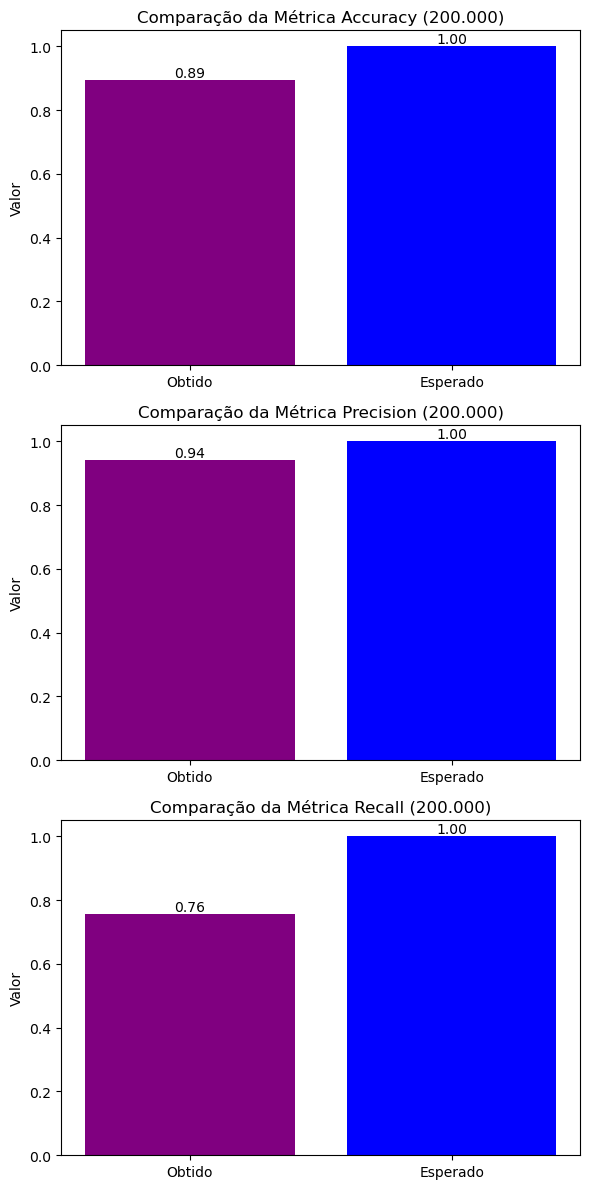

In [489]:
# Definir os valores obtidos
obtido_accuracy = accuracy
obtido_precision = precision
obtido_recall = recall

# Definir os valores esperados manualmente
expected_accuracy = 1.00
expected_precision = 1.00
expected_recall = 1.00

colors = ['purple', 'green'] 

# Criar os gráficos individuais
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 12))

# Gráfico para a métrica Accuracy
ax1.bar(['Obtido', 'Esperado'], [obtido_accuracy, expected_accuracy], color=['purple', 'blue'])
ax1.text(0, obtido_accuracy, f'{obtido_accuracy:.2f}', ha='center', va='bottom', color='black')
ax1.text(1, expected_accuracy, f'{expected_accuracy:.2f}', ha='center', va='bottom', color='black')
ax1.set_title('Comparação da Métrica Accuracy (200.000)')
ax1.set_ylabel('Valor')

# Gráfico para a métrica Precision
ax2.bar(['Obtido', 'Esperado'], [obtido_precision, expected_precision], color=['purple', 'blue'])
ax2.text(0, obtido_precision, f'{obtido_precision:.2f}', ha='center', va='bottom', color='black')
ax2.text(1, expected_precision, f'{expected_precision:.2f}', ha='center', va='bottom', color='black')
ax2.set_title('Comparação da Métrica Precision (200.000)')
ax2.set_ylabel('Valor')

# Gráfico para a métrica Recall
ax3.bar(['Obtido', 'Esperado'], [obtido_recall, expected_recall], color=['purple', 'blue'])
ax3.text(0, obtido_recall, f'{obtido_recall:.2f}', ha='center', va='bottom', color='black')
ax3.text(1, expected_recall, f'{expected_recall:.2f}', ha='center', va='bottom', color='black')
ax3.set_title('Comparação da Métrica Recall (200.000)')
ax3.set_ylabel('Valor')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


Accuracy (Acurácia): A acurácia representa a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões. Neste caso, a acurácia é de aproximadamente 0.89, o que significa que o modelo acerta cerca de 89% das previsões.

Precision (Precisão): A precisão é a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo. Neste caso, a precisão é de aproximadamente 0.94, o que indica que cerca de 94% das previsões positivas feitas pelo modelo estão corretas.

Recall (Revocação): A revocação representa a proporção de instâncias positivas corretamente identificadas pelo modelo em relação ao total de instâncias positivas. Neste caso, a revocação é de aproximadamente 0.76, o que significa que o modelo identifica corretamente cerca de 76% das instâncias positivas.

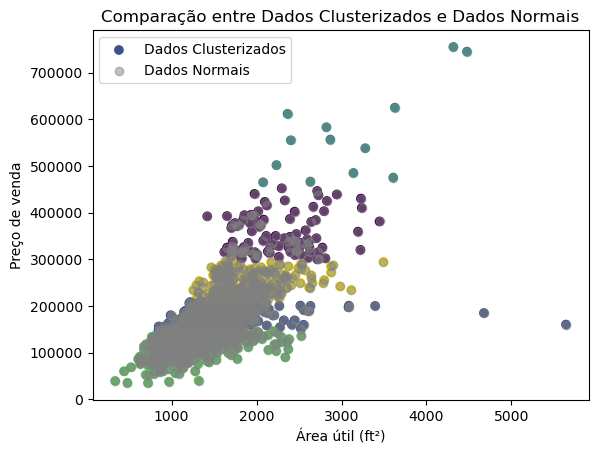

In [417]:
# Plotar os dados clusterizados
plt.scatter(df_cleaned_kmeans['GrLivArea'], df_cleaned_kmeans['SalePrice'], c=df_cleaned_kmeans['cluster'], cmap='viridis', label='Dados Clusterizados')

# Plotar os dados normais
plt.scatter(data['GrLivArea'], data['SalePrice'], color='gray', alpha=0.5, label='Dados Normais')

# Definir os rótulos dos eixos
plt.xlabel('Área útil (ft²)')
plt.ylabel('Preço de venda')
plt.title('Comparação entre Dados Clusterizados e Dados Normais')

plt.legend()

# Mostrar o gráfico
plt.show()

Ao observar o gráfico, podemos notar que os clusters se formaram com base em áreas de preço e tamanho de área útil que tendem a se agrupar juntas. Por exemplo, podemos ver que os imóveis de preço mais baixo e com áreas úteis menores tendem a se agrupar em um cluster específico, indicando que essas características estão relacionadas.